In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('prices.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df['balcony'] = df.balcony.fillna(0)

In [7]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony            0
price              0
dtype: int64

In [8]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [9]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [10]:
df.drop(['area_type','availability','society'],axis=1,inplace=True)
df

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,0.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [11]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [14]:
df

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,0.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [15]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

/var/folders/vt/qtqcdsy13yzc5w2_z7ctw1pr0000gn/T/ipykernel_70260/3978830486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))


In [17]:
df = df.drop('size',axis=1)

In [18]:
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [19]:
df[df['bhk'] > 15]

,location,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,8000,27.0,0.0,230.0,27
3379,1Hanuman Nagar,2000,16.0,0.0,490.0,19
3609,Koramangala Industrial Layout,10000,16.0,0.0,550.0,16
4684,Munnekollal,2400,40.0,0.0,660.0,43
11559,1Kasavanhalli,1200,18.0,0.0,200.0,18


In [20]:
def converter(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [21]:
df['total_sqft'] = df['total_sqft'].apply(converter)

In [22]:
df

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5
13316,Richards Town,3600.0,5.0,0.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [23]:
df['total_sqft'].iloc[2475]

1200.0

In [24]:
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [25]:
df.isnull().sum()

location       0
total_sqft    46
bath           0
balcony        0
price          0
bhk            0
dtype: int64

In [26]:
df = df.dropna()

In [27]:
df.isnull().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [28]:
df.isnull().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [29]:
df

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5
13316,Richards Town,3600.0,5.0,0.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [30]:
df['price_per_sqft'] = (df['price']*100000)/df['total_sqft']

/var/folders/vt/qtqcdsy13yzc5w2_z7ctw1pr0000gn/T/ipykernel_70260/4244324591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft'] = (df['price']*100000)/df['total_sqft']


In [31]:
df


,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13316,Richards Town,3600.0,5.0,0.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


In [32]:
df['location'] = df['location'].apply(lambda x: x.strip())

location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

/var/folders/vt/qtqcdsy13yzc5w2_z7ctw1pr0000gn/T/ipykernel_70260/1065383816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'] = df['location'].apply(lambda x: x.strip())


location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [33]:
len(location_stats[location_stats <= 10])

1047

In [34]:
location_stats_less = location_stats[location_stats <= 10]
location_stats_less

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [35]:
df.location = df['location'].apply(lambda x: 'others' if x in location_stats_less else x)
df

/var/folders/vt/qtqcdsy13yzc5w2_z7ctw1pr0000gn/T/ipykernel_70260/228254446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.location = df['location'].apply(lambda x: 'others' if x in location_stats_less else x)


,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13316,others,3600.0,5.0,0.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


In [36]:
len(df['location'].unique())

241

In [37]:
df[df.total_sqft/df.bhk < 300]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,others,1020.0,6.0,0.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,0.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,others,500.0,3.0,2.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,others,1400.0,7.0,0.0,218.0,7,15571.428571
13279,others,1200.0,5.0,0.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,3.0,70.0,5,9043.927649


In [38]:
df = df[~(df.total_sqft/df.bhk < 300)]

In [39]:
df.shape

(12456, 7)

In [40]:
def remove_outlier(data):
    df_out = pd.DataFrame()
    for key, subdf in data.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out




In [41]:
df = remove_outlier(df)

In [42]:
df.shape

(10242, 7)

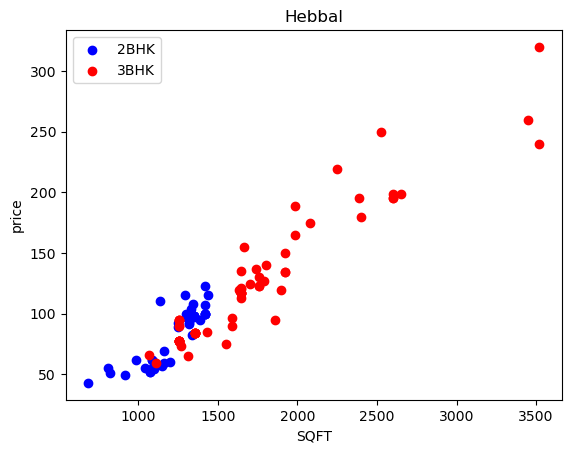

In [43]:
def scatter_viz(df,location):
    bhk2 = df[(df.location == location)&(df.bhk == 2)]
    bhk3 = df[(df.location == location)&(df.bhk == 3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2BHK')
    plt.scatter(bhk3.total_sqft,bhk3.price,color='red',label='3BHK')
    plt.xlabel('SQFT')
    plt.ylabel('price')
    plt.title(location)
    plt.legend()

scatter_viz(df,'Hebbal')

In [44]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] : {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'counts' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['counts'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    df1 = df.drop(exclude_indices,axis='index')
    return df1


In [45]:
df = remove_bhk_outliers(df)
df.shape

(10242, 7)

In [46]:
def remove_bhk_outliers_zscore(df, z_thresh=2):
    exclude_indices = []

    for location, location_df in df.groupby('location'):
        for bhk, bhk_df in location_df.groupby('bhk'):
            mean_price_per_sqft = np.mean(bhk_df.price_per_sqft)
            std_price_per_sqft = np.std(bhk_df.price_per_sqft)
            
            if std_price_per_sqft > 0:  # Avoid division by zero
                z_scores = (bhk_df.price_per_sqft - mean_price_per_sqft) / std_price_per_sqft
                outlier_indices = bhk_df[np.abs(z_scores) > z_thresh].index.values
                exclude_indices.extend(outlier_indices)
    
    exclude_indices = list(set(exclude_indices))  # Remove duplicates
    return df.drop(exclude_indices, axis='index')

In [47]:
df = remove_bhk_outliers_zscore(df)
df.shape

(9864, 7)

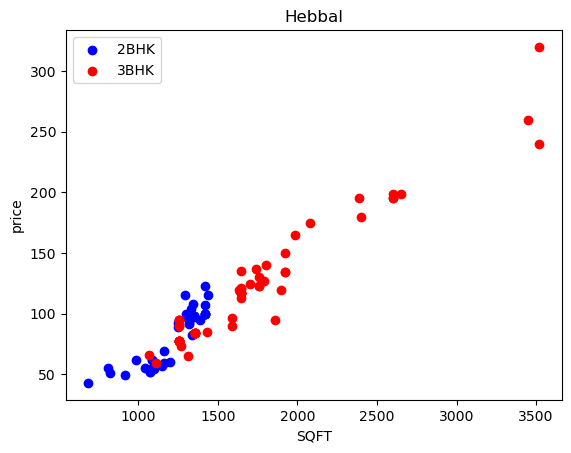

In [48]:
def scatter_viz(df,location):
    bhk2 = df[(df.location == location)&(df.bhk == 2)]
    bhk3 = df[(df.location == location)&(df.bhk == 3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2BHK')
    plt.scatter(bhk3.total_sqft,bhk3.price,color='red',label='3BHK')
    plt.xlabel('SQFT')
    plt.ylabel('price')
    plt.title(location)
    plt.legend()

scatter_viz(df,'Hebbal')

In [49]:
def remove_higher_priced_lower_bhk(df):
    exclude_indices = []

    # Iterate over each location
    for location, location_df in df.groupby('location'):
        # Sort by BHK in ascending order
        location_df = location_df.sort_values(by='bhk')
        
        # Initialize a variable to keep track of the max price_per_sqft seen so far for higher BHKs
        max_price_per_sqft = -np.inf
        
        # Iterate over each BHK, starting from the largest BHK and moving to the smallest
        for _, row in location_df.iterrows():
            if row.price_per_sqft > max_price_per_sqft:
                if max_price_per_sqft > -np.inf:
                    # If the current row's price_per_sqft is greater than any higher BHK's price_per_sqft
                    exclude_indices.append(row.name)
            else:
                # Update the max price_per_sqft seen for higher BHKs
                max_price_per_sqft = row.price_per_sqft

    # Drop the identified indices
    return df.drop(exclude_indices, axis='index')


In [50]:
df = remove_higher_priced_lower_bhk(df)
df.shape

(9864, 7)

In [51]:
df = df[df['bath']<df['bhk']+2]
df.shape

(9772, 7)

In [52]:
dummies = pd.get_dummies(df['location'],dtype='int')
df = pd.concat([df,dummies],axis=1)

In [53]:
df = df.drop('others',axis=1)
df

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.00,4,15017.543860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.00,3,11901.840491,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.00,3,12533.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.00,3,10833.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.00,2,11983.805668,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,others,1353.0,2.0,2.0,110.00,2,8130.081301,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,others,812.0,1.0,0.0,26.00,1,3201.970443,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10239,others,1440.0,2.0,2.0,63.93,3,4439.583333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10240,others,1075.0,2.0,2.0,48.00,2,4465.116279,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df.shape

(9772, 247)

In [55]:
df

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.00,4,15017.543860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.00,3,11901.840491,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.00,3,12533.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.00,3,10833.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.00,2,11983.805668,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,others,1353.0,2.0,2.0,110.00,2,8130.081301,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,others,812.0,1.0,0.0,26.00,1,3201.970443,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10239,others,1440.0,2.0,2.0,63.93,3,4439.583333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10240,others,1075.0,2.0,2.0,48.00,2,4465.116279,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df = df.drop('price_per_sqft',axis=1)

In [57]:
X = df.drop(['price','balcony','location'],axis=1)
y = df.price

In [58]:
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10239,1440.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10240,1075.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
y

0        428.00
1        194.00
2        235.00
3        130.00
4        148.00
          ...  
10237    110.00
10238     26.00
10239     63.93
10240     48.00
10241    400.00
Name: price, Length: 9772, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [61]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8429765893062521

In [62]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=8,test_size=0.2,random_state=1)
values = cross_val_score(model,X,y,cv=cv)
values.mean()

0.842282097935348

In [63]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def best_algo(X,y):
    algos = {
        'linear_regression': {
            'model': model,
            'params':{
                'normalize' : [True,False]
            }
        },
        'Lasso': {
            'model': Lasso(),
            'params':{
                'alpha': [1,2],
                'selection': ['random','cyclic']
            }
        },
        'Decision_tree': {
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores=[]
    cv = ShuffleSplit(n_splits=8,test_size=0.2,random_state=1)
    for name, ms in algos.items():
        gs = GridSearchCV(ms['model'],ms['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])





In [64]:
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10239,1440.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10240,1075.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
import pickle

In [72]:
with open('model.pickle','wb') as f:
    pickle.dump(model,f)
    

In [67]:
feature_names = list(X.columns)
feature_names

['total_sqft',
 'bath',
 'bhk',
 '1st Block Jayanagar',
 '1st Phase JP Nagar',
 '2nd Phase Judicial Layout',
 '2nd Stage Nagarbhavi',
 '5th Block Hbr Layout',
 '5th Phase JP Nagar',
 '6th Phase JP Nagar',
 '7th Phase JP Nagar',
 '8th Phase JP Nagar',
 '9th Phase JP Nagar',
 'AECS Layout',
 'Abbigere',
 'Akshaya Nagar',
 'Ambalipura',
 'Ambedkar Nagar',
 'Amruthahalli',
 'Anandapura',
 'Ananth Nagar',
 'Anekal',
 'Anjanapura',
 'Ardendale',
 'Arekere',
 'Attibele',
 'BEML Layout',
 'BTM 2nd Stage',
 'BTM Layout',
 'Babusapalaya',
 'Badavala Nagar',
 'Balagere',
 'Banashankari',
 'Banashankari Stage II',
 'Banashankari Stage III',
 'Banashankari Stage V',
 'Banashankari Stage VI',
 'Banaswadi',
 'Banjara Layout',
 'Bannerghatta',
 'Bannerghatta Road',
 'Basavangudi',
 'Basaveshwara Nagar',
 'Battarahalli',
 'Begur',
 'Begur Road',
 'Bellandur',
 'Benson Town',
 'Bharathi Nagar',
 'Bhoganhalli',
 'Billekahalli',
 'Binny Pete',
 'Bisuvanahalli',
 'Bommanahalli',
 'Bommasandra',
 'Bommasand

In [71]:
with open('features.pickle','wb') as f:
    pickle.dump(feature_names,f)

In [70]:
unique_loc = feature_names[3:]
len(unique_loc)

240

In [73]:
with open('unique_loc.pickle','wb') as f:
    pickle.dump(unique_loc,f)